In [2]:
import evaluation_functions

## Retrieve Test Inference Results

In [3]:
inf_res_test = "/path/to/test_results_output"
cnn_output_test = functions4evaluation_paper.get_inf_res(inf_res_test)

#### Retrieve Ground Truth Labels

In [5]:
neg_grnd_truth_dir_test = "/path/to/ground_truth/test_alive_labels_path.txt"
neg_dict_groundtruth_test = functions4evaluation_paper.get_groundtruthdict(neg_grnd_truth_dir_test, label_type="neg")
pos_grnd_truth_dir_test = "/path/to/ground_truth/test_dead_labels_path.txt"
pos_dict_groundtruth_test = functions4evaluation_paper.get_groundtruthdict(pos_grnd_truth_dir_test, label_type="pos")


In [6]:
groundtruth_dict_test = dict(pos_dict_groundtruth_test)
groundtruth_dict_test.update(neg_dict_groundtruth_test)

#### Find ground truth label using read_id and retrieve positive probabilities from model

In [7]:
cnn_labels_test, cnn_probabilities_test, ground_truth_labels_test = functions4evaluation_paper.get_labels_probs_cnn_labels(cnn_output_test, groundtruth_dict_test)

#### Evaluation Metrics (Accuracy, Precision, Recall, Specificity) Calculation and Plot

In [8]:
accuracy_test, recall_test, specificity_test, roc_auc_test, aupr_test, precision_test, f1_test, fpr_test, tpr_test, recall_pr_test, precision_pr_test = functions4evaluation_paper.calc_all_metrics(ground_truth_labels_test, cnn_labels_test, cnn_probabilities_test)
print(accuracy_test, recall_test, specificity_test, roc_auc_test, aupr_test, precision_test, f1_test)

0.8261559278350515 0.7376005154639175 0.9147113402061856 0.8953730736196729 0.9195552221340638 0.8963546217908362 0.8092653414979337


In [9]:
metrics = [
    {"Metrics": " ", "Accuracy": accuracy_test, "F1 Score":f1_test, "Recall": recall_test, "Specificity": specificity_test, "Precision": precision_test},
]

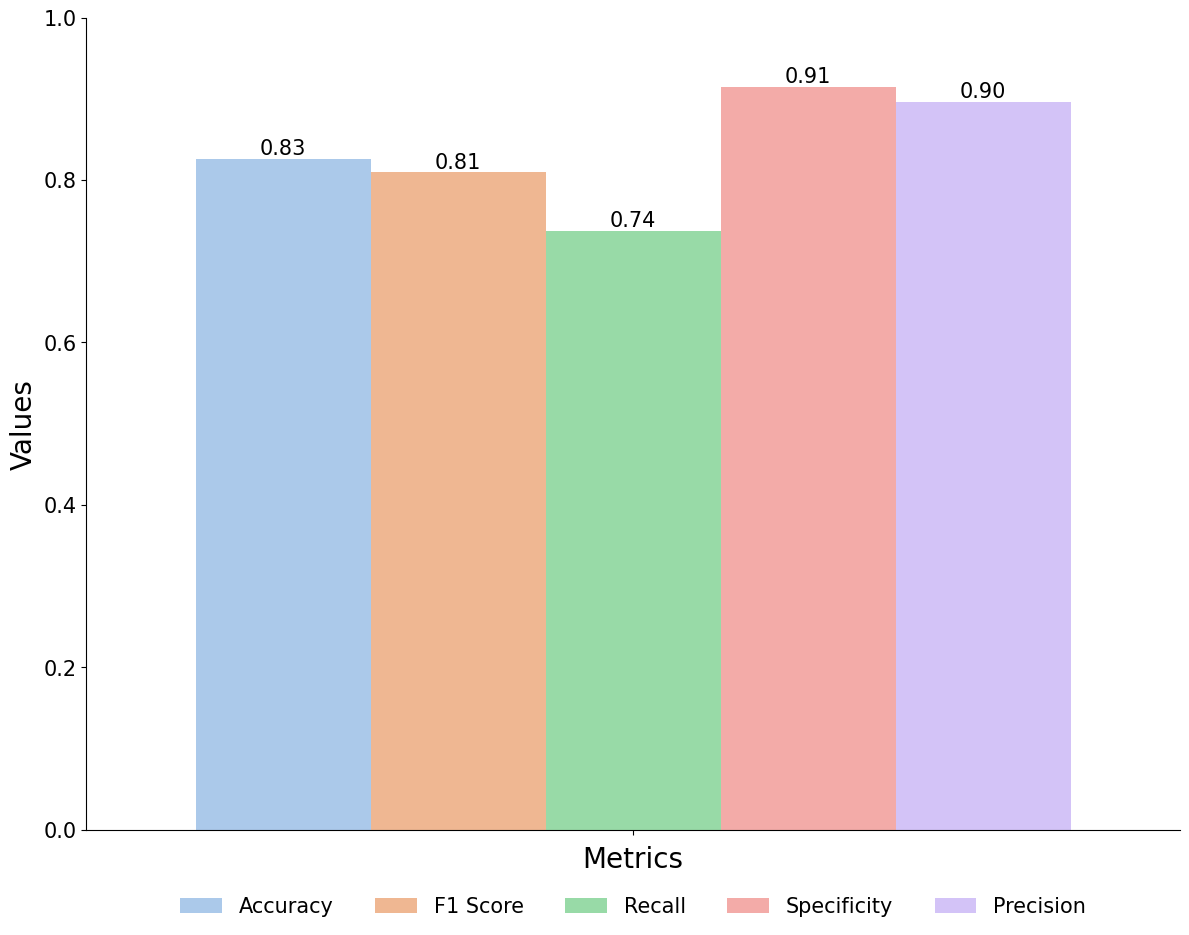

In [10]:
fig_name_metrics = "/path/to/figure_output/metrics.pdf"
functions4evaluation_paper.plot_metrics(metrics, fig_name_metrics)

In [11]:
ratio_zeros_test, ratio_one_test = functions4evaluation_paper.count_ratio(ground_truth_labels_test)

Total number of reads: 776000
The percentage of 1s: 0.5
The percentage of 0s: 0.5


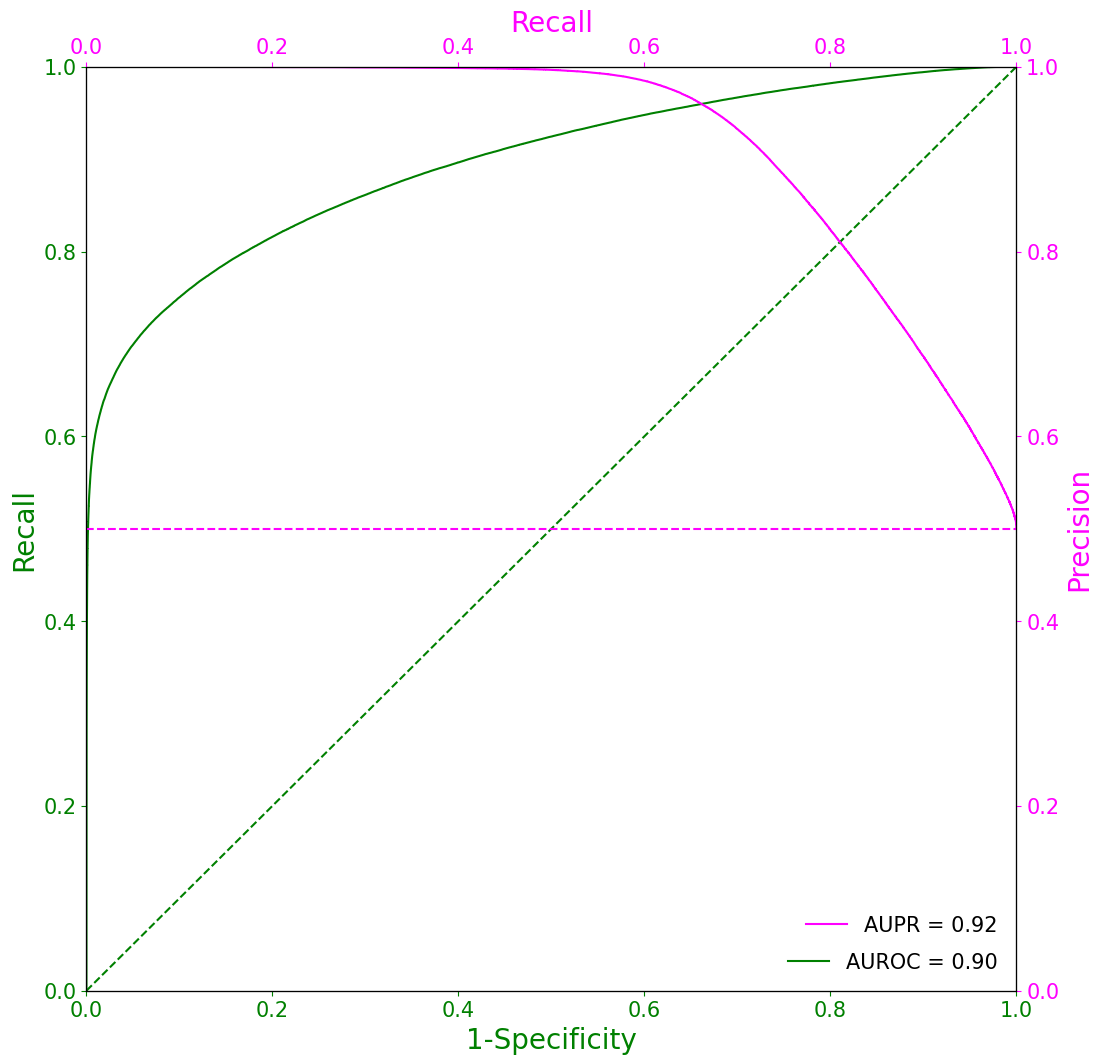

In [12]:
fig_name_pdf = "/path/to/figure_output/combined_aupr_auroc_test.pdf"
functions4evaluation_paper.plot_combined_aupr_auroc(recall_pr_test, precision_pr_test, aupr_test, fpr_test, tpr_test, roc_auc_test, fig_name_pdf, prevalance=ratio_one_test)

## Retrieve Validation Inference Results

In [13]:
inf_res_val = "/path/to/validation_results_output"
cnn_output_val = functions4evaluation_paper.get_inf_res(inf_res_val)


#### Retrieve Ground Truth Labels

In [17]:
neg_grnd_truth_dir_val = "/path/to/ground_truth/validation_alive_labels_path.txt"
neg_dict_groundtruth_val = functions4evaluation_paper.get_groundtruthdict(neg_grnd_truth_dir_val, label_type="neg")
pos_grnd_truth_dir_val =  "/path/to/ground_truth/validation_dead_labels_path.txt"
pos_dict_groundtruth_val = functions4evaluation_paper.get_groundtruthdict(pos_grnd_truth_dir_val, label_type="pos")


In [18]:
groundtruth_dict_val = dict(pos_dict_groundtruth_val)
groundtruth_dict_val.update(neg_dict_groundtruth_val)

#### Find ground truth label using read_id and retrieve positive probabilities from model

In [21]:
cnn_labels_val, cnn_probabilities_val, ground_truth_labels_val = functions4evaluation_paper.get_labels_probs_cnn_labels(cnn_output_val, groundtruth_dict_val)

#### Evaluation Metrics (Accuracy, Precision, Recall, Specificity) Calculation and Plot

In [23]:
accuracy_val, recall_val, specificity_val, roc_auc_val, aupr_val, precision_val, f1_val, fpr_val, tpr_val, recall_pr_val, precision_pr_val = functions4evaluation_paper.calc_all_metrics(ground_truth_labels_val, cnn_labels_val, cnn_probabilities_val)
print(accuracy_val, recall_val, specificity_val, roc_auc_val, aupr_val, precision_val, f1_val)

0.8257809278350515 0.7322577319587629 0.9193041237113402 0.8943092027878894 0.9186917272802657 0.9007374154318287 0.8078063648486125


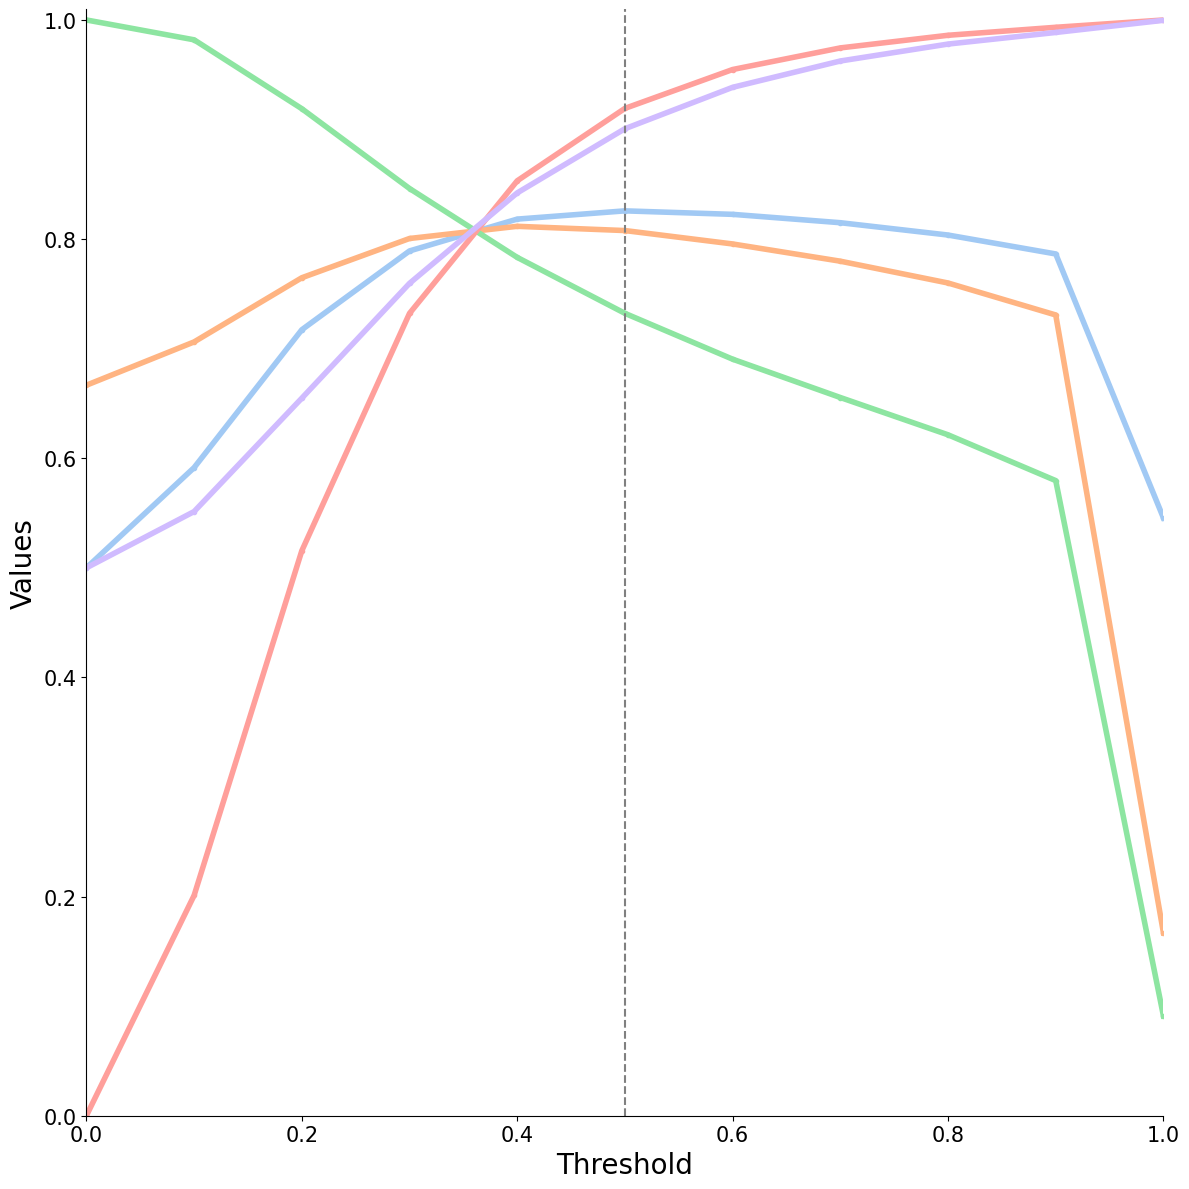

In [24]:
figure_dir = "/path/to/figure_output/"
functions4evaluation_paper.calculate_metrics_4_thresholds(cnn_probabilities_val, ground_truth_labels_val,figure_dir,data_name="validation")